In [1]:
import random

# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, algorithms, base, creator
from tqdm import tqdm
import seaborn as sns

sys.path.append("../")
from calculus.term import Var, Atom, Application, Abstraction
from calculus.strategy import (
    LeftmostOutermostStrategy,
    LeftmostInnermostStrategy,
    RightmostInnermostStrategy,
    RightmostOutermostStrategy,
    RandomStrategy,
    MixedStrategy,
)
from calculus.generation import genTerm

In [3]:
UPLIMIT = 60
DOWNLIMIT = 50

LAMBDA_TERM_COUNT = 200

RANDOM_AVERAGE_COUNT = 20


def filterTerms(term):
    return term and DOWNLIMIT < term.verticesNumber < UPLIMIT


def flatten(t):
    return [item for sublist in t for item in sublist]


terms = flatten(
    [
        list(filter(filterTerms, [genTerm(p, UPLIMIT) for i in range(7000)]))
        for p in np.arange(0.49, 0.51, 0.02)
    ]
)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

stepsLO = list(map(lambda term: term.normalize(LeftmostOutermostStrategy())[1], terms))
print("number of steps to normalize using LO strategy= {}".format(stepsLO))

terms_with_normal_form = []
stepsLO_temp = []
for i, term in enumerate(terms):
    if stepsLO[i] != float("inf"):
        terms_with_normal_form.append(term)
        stepsLO_temp.append(stepsLO[i])
terms = terms_with_normal_form[:LAMBDA_TERM_COUNT]
stepsLO = stepsLO_temp[:LAMBDA_TERM_COUNT]

print(f"number of terms with normal form {len(terms)}")
assert len(terms) == LAMBDA_TERM_COUNT

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [
    sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

number of lambda terms 259
number of vertices= [54, 57, 55, 55, 56, 54, 58, 54, 51, 57, 56, 55, 58, 54, 53, 52, 59, 59, 54, 53, 52, 53, 56, 51, 56, 55, 56, 55, 57, 52, 59, 56, 53, 58, 56, 56, 58, 52, 54, 51, 58, 59, 54, 52, 58, 54, 55, 54, 54, 57, 52, 59, 56, 59, 53, 54, 51, 59, 58, 54, 58, 59, 58, 55, 58, 51, 59, 58, 56, 55, 56, 56, 57, 55, 52, 54, 59, 53, 51, 57, 57, 51, 54, 51, 52, 58, 56, 57, 57, 55, 52, 53, 57, 56, 51, 51, 53, 57, 52, 59, 52, 53, 53, 53, 53, 56, 57, 57, 54, 54, 59, 58, 51, 51, 51, 57, 54, 51, 52, 57, 53, 51, 55, 53, 52, 53, 53, 51, 58, 56, 59, 59, 53, 55, 54, 58, 54, 55, 57, 56, 55, 56, 58, 51, 52, 51, 52, 55, 53, 51, 55, 53, 58, 51, 53, 51, 52, 59, 59, 57, 58, 59, 53, 54, 57, 51, 54, 53, 56, 52, 54, 57, 51, 59, 53, 58, 59, 56, 57, 59, 57, 52, 59, 55, 51, 57, 58, 58, 57, 56, 52, 55, 57, 56, 53, 52, 53, 58, 54, 56, 53, 54, 56, 58, 51, 59, 57, 52, 53, 54, 53, 59, 57, 52, 53, 56, 54, 55, 51, 59, 52, 52, 55, 54, 58, 53, 53, 55, 53, 56, 53, 52, 58, 51, 59, 55, 59, 56, 

In [4]:
def draw_hist(data):
    steps = [x for x in data if x != float("inf")]

    distributions = get_common_distributions()
    distributions.remove("expon")
    distributions.remove("cauchy")
    f = Fitter(steps, distributions=distributions)
    f.fit()
    summary = f.summary()
    distribution = f.get_best(method="sumsquare_error")

    print("==============")
    print(f"number of not normalized terms: {len(data) - len(steps)}")
    print(summary)
    print(distribution)
    print(f'Norm distribution: {f.fitted_param["norm"]}')
    print("==============")
    plt.xlabel("Number of reduction steps")
    plt.show()

    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()
    mu, sigma = f_ln.fitted_param["norm"]
    print(
        f"Log Norm distribution params: ({mu}, {sigma}); expected value = {np.e ** (mu + (sigma ** 2) / 2)}"
    )

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 33.33it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.005489  1351.603528 -2084.777945     inf      0.095988   
exponpow         0.007904  1282.991513 -2011.835808     inf      0.147677   
powerlaw         0.021626  1163.481969 -1810.541178     inf      0.411395   
rayleigh         0.031303  2531.409099 -1741.877362     inf      0.258671   
norm             0.036654  2698.718932 -1710.315148     inf      0.229378   

             ks_pvalue  
lognorm   4.688980e-02  
exponpow  2.852005e-04  
powerlaw  3.903490e-31  
rayleigh  2.723625e-12  
norm      9.862964e-10  
{'lognorm': {'s': 1.091110419721388, 'loc': 0.30777479791954343, 'scale': 5.523826328528676}}
Norm distribution: (9.865, 11.965231924204396)


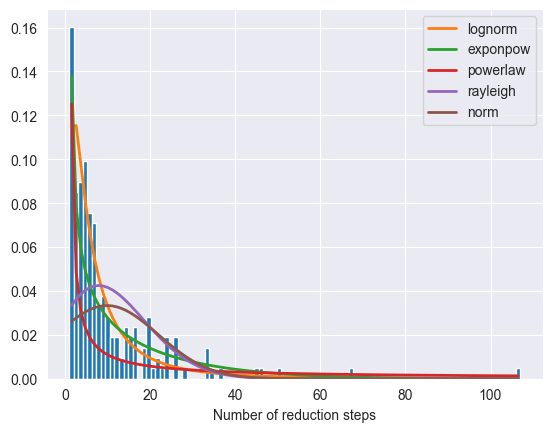

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.59it/s]

Log Norm distribution params: (1.8005598489000534, 0.9986748387989325); expected value = 9.966560761395048


In [5]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 40.81it/s]


number of not normalized terms: 2
          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma            0.413620  829.291930 -1206.007760     inf      0.060834   
chi2             0.413620  829.292002 -1206.007758     inf      0.060834   
lognorm          0.414526  831.848999 -1205.574852     inf      0.068983   
rayleigh         0.421067  872.590266 -1207.762866     inf      0.113431   
norm             0.432264  918.897023 -1202.566672     inf      0.137737   

          ks_pvalue  
gamma      0.438959  
chi2       0.438971  
lognorm    0.289336  
rayleigh   0.011257  
norm       0.000973  
{'gamma': {'a': 2.3304498987018043, 'loc': 1.4950294594678186, 'scale': 4.054763112393099}}
Norm distribution: (10.944444444444445, 6.027876692387689)


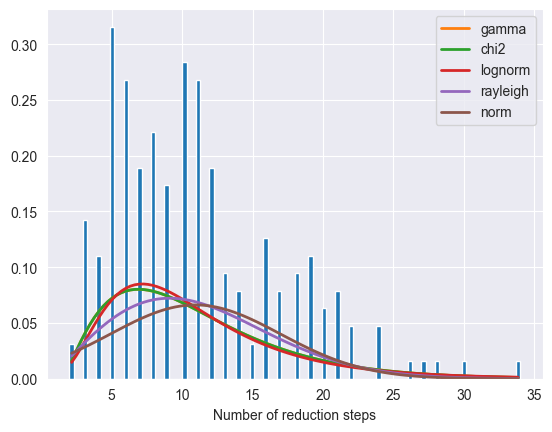

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.84it/s]

Log Norm distribution params: (2.2394769120886595, 0.5694308502178724); expected value = 11.04085693409542


In [6]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 36.03it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.003249  1237.865643 -2189.646618     inf      0.030414   
chi2             0.006118  1330.486275 -2063.078231     inf      0.050820   
gamma            0.006118  1330.484916 -2063.076832     inf      0.050820   
exponpow         0.013507  1394.556846 -1904.674999     inf      0.092938   
rayleigh         0.021347  1942.297495 -1818.431756     inf      0.196939   

             ks_pvalue  
lognorm   9.899645e-01  
chi2      6.607078e-01  
gamma     6.607101e-01  
exponpow  5.920237e-02  
rayleigh  2.844715e-07  
{'lognorm': {'s': 0.9437604830251847, 'loc': 1.2996145332993965, 'scale': 6.742276770970097}}
Norm distribution: (11.593499999999999, 10.626370864504965)


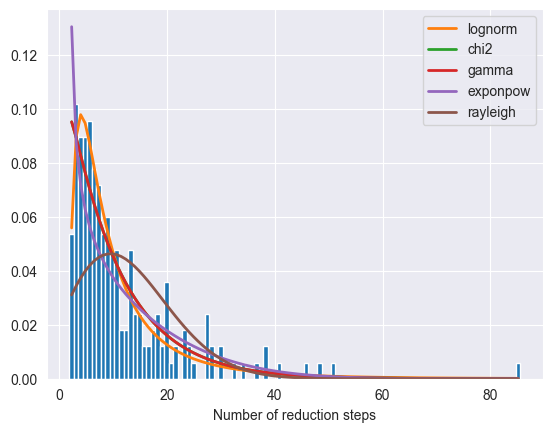

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.41it/s]

Log Norm distribution params: (2.1473541801880094, 0.7585052445632975); expected value = 11.41603884903932


In [7]:
draw_hist(stepsRand)

# Run through probabilities 0-100 (step 5) of LO and RI

In [8]:
from contextlib import contextmanager
import threading
import _thread


class TimeoutException(Exception):
    def __init__(self, msg=''):
        self.msg = msg


@contextmanager
def time_limit(seconds, msg=''):
    timer = threading.Timer(seconds, lambda: _thread.interrupt_main())
    timer.start()
    try:
        yield
    except KeyboardInterrupt:
        raise TimeoutException("Timed out for operation {}".format(msg))
    finally:
        # if the action ends in specified time, timer is canceled
        timer.cancel()

In [9]:
steps_mixed_all = []
expected_values = []
values = list(range(0, 101, 5))
iters = len(values) - 1

for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = []
    for term in tqdm(terms, desc=f"it {inx} / {iters}"):
        term_random_steps = []
        for i in range(RANDOM_AVERAGE_COUNT):
            trs = 0
            try:
                with time_limit(15, "do norm"):
                    trs = term.normalize(MixedStrategy([LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p))[1]
            except TimeoutException:
                trs = float("inf")
            term_random_steps.append(trs)
        steps.append(sum(term_random_steps) / RANDOM_AVERAGE_COUNT)

    steps_mixed_all.append(steps)

it 20 / 20: 100%|██████████| 200/200 [00:12<00:00, 16.26it/s]


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


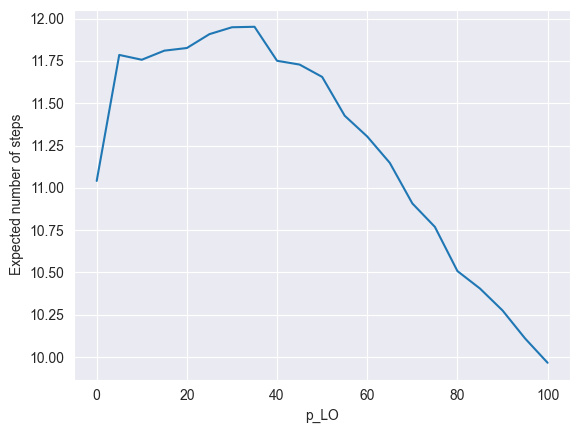

In [10]:
expected_values = []
for steps in steps_mixed_all:
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    expected_values.append(result)

plt.plot(values, expected_values)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.show()

# Run through probabilities 0-100 (step 1) of LO and RI

In [11]:
steps_mixed_all = []
expected_values = []
values = list(range(0, 101, 1))
iters = len(values) - 1

for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = []
    for term in tqdm(terms, desc=f"it {inx} / {iters}"):
        term_random_steps = []
        for i in range(RANDOM_AVERAGE_COUNT):
            trs = 0
            try:
                with time_limit(15, "do norm"):
                    trs = term.normalize(MixedStrategy([LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p))[1]
            except TimeoutException:
                trs = float("inf")
            term_random_steps.append(trs)
        steps.append(sum(term_random_steps) / RANDOM_AVERAGE_COUNT)

    steps_mixed_all.append(steps)

it 100 / 100: 100%|██████████| 200/200 [00:09<00:00, 20.63it/s]


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


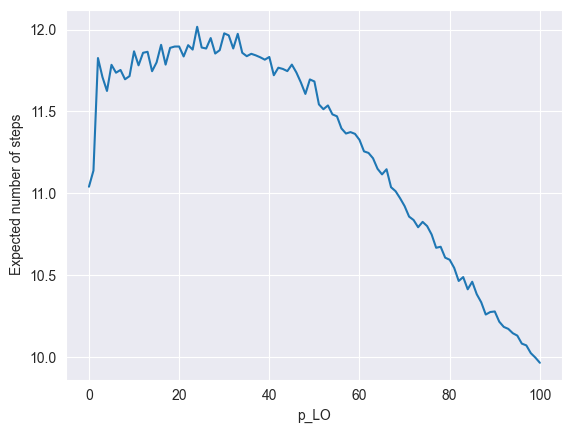

In [12]:
expected_values = []
for steps in steps_mixed_all:
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    expected_values.append(result)

plt.plot(values, expected_values)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.show()

# Genetic search

In [13]:
def eaSimpleWithElitism(
    population,
    toolbox,
    cxpb,
    mutpb,
    ngen,
    stats=None,
    halloffame=None,
    verbose=__debug__,
):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.91it/s]


expected number of steps to normalize using Mixed strategy= 10.388474814752593


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.46it/s]


expected number of steps to normalize using Mixed strategy= 10.071782375279886


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.21it/s]


expected number of steps to normalize using Mixed strategy= 10.235272328564129


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


expected number of steps to normalize using Mixed strategy= 10.500545531729221


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.45it/s]


expected number of steps to normalize using Mixed strategy= 10.590660624833374


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 10.092730120668701


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.95it/s]


expected number of steps to normalize using Mixed strategy= 11.7263231522172


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 11.330215850983574


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.50it/s]


expected number of steps to normalize using Mixed strategy= 11.493845780168137


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.44it/s]


expected number of steps to normalize using Mixed strategy= 11.008595442968595


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 10.903167877980424


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.25it/s]


expected number of steps to normalize using Mixed strategy= 10.61500566715015


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 10.789078563711897


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.82it/s]


expected number of steps to normalize using Mixed strategy= 10.99161518322231


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.72it/s]


expected number of steps to normalize using Mixed strategy= 10.496104567853386


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


expected number of steps to normalize using Mixed strategy= 11.543687373211444


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.30it/s]


expected number of steps to normalize using Mixed strategy= 10.363816934319312


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 10.044553701840117


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.19it/s]


expected number of steps to normalize using Mixed strategy= 10.322749673650502


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.61it/s]


expected number of steps to normalize using Mixed strategy= 10.657788927864958
gen	nevals	min    	avg    
0  	20    	10.0446	10.7083


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.79it/s]


expected number of steps to normalize using Mixed strategy= 10.853948894927575


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 10.406073291180787


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.09it/s]


expected number of steps to normalize using Mixed strategy= 10.2865719592668


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.88it/s]


expected number of steps to normalize using Mixed strategy= 10.67246714213863


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.70it/s]


expected number of steps to normalize using Mixed strategy= 10.240682048907566


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.45it/s]


expected number of steps to normalize using Mixed strategy= 10.305819188254114


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 10.574838839530893


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.49it/s]


expected number of steps to normalize using Mixed strategy= 10.625501170435683


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.70it/s]


expected number of steps to normalize using Mixed strategy= 10.416338290529588


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 10.44115420775805


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.20it/s]


expected number of steps to normalize using Mixed strategy= 10.400005280102727


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.24it/s]


expected number of steps to normalize using Mixed strategy= 10.389168095885156


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


expected number of steps to normalize using Mixed strategy= 10.112834254770148


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


expected number of steps to normalize using Mixed strategy= 10.49046958763088
1  	14    	10.0446	10.6746


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.08it/s]


expected number of steps to normalize using Mixed strategy= 10.52393441714637


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.52it/s]


expected number of steps to normalize using Mixed strategy= 10.938863013122372


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.69it/s]


expected number of steps to normalize using Mixed strategy= 10.063677451291499


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.47it/s]


expected number of steps to normalize using Mixed strategy= 10.312714815009631


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 10.27137250461804


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.12it/s]


expected number of steps to normalize using Mixed strategy= 10.07043118096072


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.70it/s]


expected number of steps to normalize using Mixed strategy= 10.439916087299643


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.70it/s]


expected number of steps to normalize using Mixed strategy= 10.114760204965016


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.09it/s]


expected number of steps to normalize using Mixed strategy= 10.417893976510289


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.70it/s]


expected number of steps to normalize using Mixed strategy= 10.065637654807869


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 10.835494148741162


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.46it/s]


expected number of steps to normalize using Mixed strategy= 10.071144206058946


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 10.094309516764943


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.68it/s]


expected number of steps to normalize using Mixed strategy= 10.323234623309048
2  	14    	10.0446	11.2165


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.03it/s]


expected number of steps to normalize using Mixed strategy= 10.065453973050309


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.23it/s]


expected number of steps to normalize using Mixed strategy= 10.086942701234655


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.27it/s]


expected number of steps to normalize using Mixed strategy= 10.32290247357614


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 10.444072547691883


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.71it/s]


expected number of steps to normalize using Mixed strategy= 10.552071302458604


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.54it/s]


expected number of steps to normalize using Mixed strategy= 10.008484890655861


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 10.046145367366378


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.92it/s]


expected number of steps to normalize using Mixed strategy= 10.875797410474819


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.38it/s]


expected number of steps to normalize using Mixed strategy= 10.183031438259796


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 10.702820080449433


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


expected number of steps to normalize using Mixed strategy= 10.087193565734893


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]


expected number of steps to normalize using Mixed strategy= 10.347568801382852


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.08it/s]


expected number of steps to normalize using Mixed strategy= 10.068916992376185


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.46it/s]


expected number of steps to normalize using Mixed strategy= 10.05398435527335


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.23it/s]


expected number of steps to normalize using Mixed strategy= 10.088592664344318


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.20it/s]


expected number of steps to normalize using Mixed strategy= 10.396572207762262
3  	16    	10.0446	11.199 


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.06it/s]


expected number of steps to normalize using Mixed strategy= 10.079889763870757


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 9.99548992418332


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 10.061761569558382


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.12it/s]


expected number of steps to normalize using Mixed strategy= 10.051453570834097


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.78it/s]


expected number of steps to normalize using Mixed strategy= 10.104319128691085


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.50it/s]


expected number of steps to normalize using Mixed strategy= 10.068547306019148


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 10.028342729029026


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.26it/s]


expected number of steps to normalize using Mixed strategy= 10.076029312803701


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 10.073462647016006


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.69it/s]


expected number of steps to normalize using Mixed strategy= 10.086395752626428


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.08it/s]


expected number of steps to normalize using Mixed strategy= 10.155814644024383


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.86it/s]


expected number of steps to normalize using Mixed strategy= 10.08714483239536


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.93it/s]


expected number of steps to normalize using Mixed strategy= 10.472459833395146


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.50it/s]


expected number of steps to normalize using Mixed strategy= 10.087201768838165


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.28it/s]


expected number of steps to normalize using Mixed strategy= 10.067278060587437


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.86it/s]


expected number of steps to normalize using Mixed strategy= 10.05697228524832
4  	16    	10.0446	11.2937


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.40it/s]


expected number of steps to normalize using Mixed strategy= 10.058436378650507


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.78it/s]


expected number of steps to normalize using Mixed strategy= 10.041161107477167


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.18it/s]


expected number of steps to normalize using Mixed strategy= 10.115309976466177


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 10.053896530238594


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.12it/s]


expected number of steps to normalize using Mixed strategy= 10.030836461459328


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.46it/s]


expected number of steps to normalize using Mixed strategy= 10.097598218618883


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.31it/s]


expected number of steps to normalize using Mixed strategy= 10.106741397058157


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.07it/s]


expected number of steps to normalize using Mixed strategy= 10.10446814660328


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.10it/s]


expected number of steps to normalize using Mixed strategy= 10.052142728638508


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 10.063840262743192


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.21it/s]


expected number of steps to normalize using Mixed strategy= 10.045888170247453


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.01it/s]


expected number of steps to normalize using Mixed strategy= 10.075344612608752


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.28it/s]


expected number of steps to normalize using Mixed strategy= 10.072004950330035


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.54it/s]


expected number of steps to normalize using Mixed strategy= 10.062793314615579


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.26it/s]


expected number of steps to normalize using Mixed strategy= 10.065454777948359


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.93it/s]


expected number of steps to normalize using Mixed strategy= 10.069021825045038
5  	16    	10.0308	10.9094


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.78it/s]


expected number of steps to normalize using Mixed strategy= 10.092640495448897


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.79it/s]


expected number of steps to normalize using Mixed strategy= 10.041559425676462


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.78it/s]


expected number of steps to normalize using Mixed strategy= 10.035941117643771


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.86it/s]


expected number of steps to normalize using Mixed strategy= 10.057866722756463


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 10.051601257244313


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.78it/s]


expected number of steps to normalize using Mixed strategy= 10.032786644414207


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 10.07478182239976


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.54it/s]


expected number of steps to normalize using Mixed strategy= 10.038322553092849


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.08it/s]


expected number of steps to normalize using Mixed strategy= 10.052635102551356


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.54it/s]


expected number of steps to normalize using Mixed strategy= 10.04879646444258


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.84it/s]


expected number of steps to normalize using Mixed strategy= 10.056383031593212


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 21.22it/s]


expected number of steps to normalize using Mixed strategy= 9.980400039139981


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.70it/s]


expected number of steps to normalize using Mixed strategy= 10.037111976095458


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.99it/s]


expected number of steps to normalize using Mixed strategy= 10.03726141053536


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.78it/s]


expected number of steps to normalize using Mixed strategy= 10.05424537503073
6  	15    	10.0308	10.1836


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 10.084539067726988


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 10.059776349197099


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 10.050800410155073


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 10.054296333708674


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.78it/s]


expected number of steps to normalize using Mixed strategy= 10.022988663362414


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.01it/s]


expected number of steps to normalize using Mixed strategy= 10.057778337708088


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.31it/s]


expected number of steps to normalize using Mixed strategy= 10.075709034131497


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.49it/s]


expected number of steps to normalize using Mixed strategy= 10.046133710133358


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.16it/s]


expected number of steps to normalize using Mixed strategy= 10.051638569485466


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 10.051574421878339


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 10.098119730876707


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.86it/s]


expected number of steps to normalize using Mixed strategy= 10.049253987943708


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 10.06833815620728


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.12it/s]


expected number of steps to normalize using Mixed strategy= 10.0306608958108


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.54it/s]


expected number of steps to normalize using Mixed strategy= 10.071654302552178


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.31it/s]

expected number of steps to normalize using Mixed strategy= 10.041565600831575
7  	16    	10.023 	10.4712
- Best solution is: 
p =  [0.9679031614930733, 0.019602999441906962, 0.00571665657441057, 0.0005501245368292856]


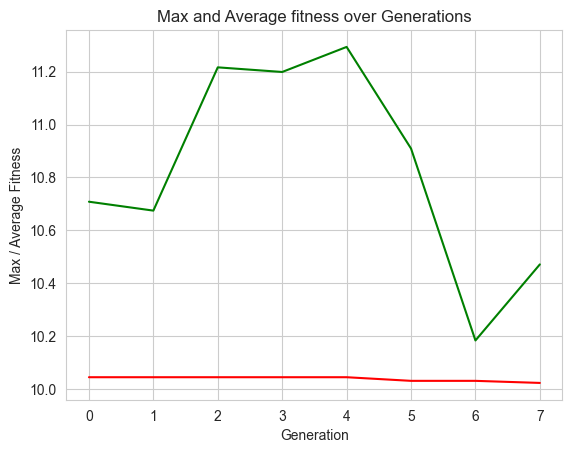

In [14]:
STRATEGIES = [
    LeftmostOutermostStrategy(),
    RightmostInnermostStrategy(),
    LeftmostInnermostStrategy(),
    RightmostOutermostStrategy(),
    RandomStrategy(),
]

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [
    1.0,
    1.0,
    1.0,
    1.0,
]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register(
        "hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i]
    )

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (
        toolbox.__getattribute__("hyperparameter_" + str(i)),
    )


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [
        sum(
            [
                term.normalize(MixedStrategy(STRATEGIES, p))[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in terms
    ]
    steps = list(filter(lambda x: x != float("inf"), steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    print(
        "expected number of steps to normalize using Mixed strategy= {}".format(result)
    )
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return (result,)


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register(
    "mate",
    tools.cxSimulatedBinaryBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
)
toolbox.register(
    "mutate",
    tools.mutPolynomialBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
    indpb=1.0 / NUM_OF_PARAMS,
)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    stats=stats,
    halloffame=hof,
    verbose=True,
)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color="red")
plt.plot(meanFitnessValues, color="green")
plt.xlabel("Generation")
plt.ylabel("Max / Average Fitness")
plt.title("Max and Average fitness over Generations")
plt.show()

In [18]:
hof.items[0]

[0.9679031614930733,
 0.019602999441906962,
 0.00571665657441057,
 0.0005501245368292856,
 0.00622705795377998]

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 34.48it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi2             0.004578  1775.847960 -2121.056583     inf      0.151013   
lognorm          0.005580  1346.733963 -2081.489955     inf      0.090544   
exponpow         0.008190  1273.131797 -2004.728867     inf      0.126590   
powerlaw         0.019168  1101.583158 -1834.672594     inf      0.286073   
rayleigh         0.031366  2506.039494 -1741.474973     inf      0.253002   

             ks_pvalue  
chi2      1.903381e-04  
lognorm   7.072318e-02  
exponpow  2.975004e-03  
powerlaw  5.565514e-15  
rayleigh  9.030157e-12  
{'chi2': {'df': 1.5680872208232075, 'loc': 0.9999999999999999, 'scale': 4.239890168559599}}
Norm distribution: (9.945, 11.945461481248852)


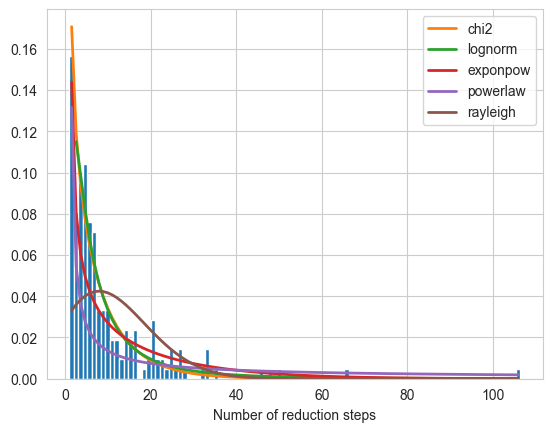

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.95it/s]

Log Norm distribution params: (1.8142829563146217, 0.9922419914692525); expected value = 10.039778388205308


In [15]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 40.81it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.004610  1348.274071 -2119.670828     inf      0.093757   
exponpow         0.007809  1253.448398 -2014.253311     inf      0.201444   
powerlaw         0.019417  1127.430796 -1832.084843     inf      0.340611   
rayleigh         0.030803  2512.516242 -1745.094884     inf      0.255805   
gamma            0.032736  5207.645882 -1727.626794     inf      0.772763   

              ks_pvalue  
lognorm    5.565050e-02  
exponpow   1.366432e-07  
powerlaw   3.267297e-21  
rayleigh   5.010330e-12  
gamma     3.774048e-126  
{'lognorm': {'s': 1.0921687177874366, 'loc': 0.3278991504140374, 'scale': 5.531954396266281}}
Norm distribution: (9.904750000000002, 11.966793218632134)


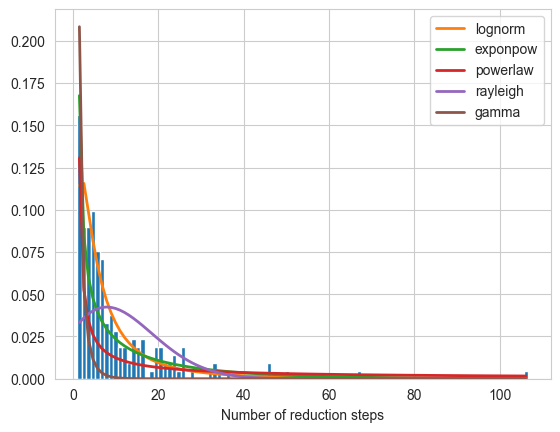

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.16it/s]

Log Norm distribution params: (1.8073766259634072, 0.9946922309621562); expected value = 9.994979761937387


In [16]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(steps)

In [19]:
def draw_2d_distribution(ax, x, y, xlabel, ylabel):
    ax.scatter(x, y, color="blue")
    ax.set(
        title="Distribution of " + xlabel.lower() + "-" + ylabel.lower(),
        xlabel=xlabel,
        ylabel=ylabel,
    )
    ax.legend(prop={"size": 10})


def draw_2d_strategy_distribution(ax, x, y, xlabel, ylabel):
    x = list(map(lambda v: -1 if v == float("inf") else v, x))
    y = list(map(lambda v: -1 if v == float("inf") else v, y))
    greater = list(
        zip(
            *list(
                filter(lambda z: z[0] >= z[1] and z[0] != -1 and z[1] != -1, zip(x, y))
            )
        )
    )
    less = list(
        zip(
            *list(
                filter(lambda z: z[0] < z[1] and z[0] != -1 and z[1] != -1, zip(x, y))
            )
        )
    )
    inf_x = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] != -1, zip(x, y)))))
    inf_y = list(zip(*list(filter(lambda z: z[0] != -1 and z[1] == -1, zip(x, y)))))
    inf_xy = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] == -1, zip(x, y)))))
    ax.scatter(
        greater[0], greater[1], color="blue", label="{} <= {}".format(ylabel, xlabel)
    )
    ax.scatter(less[0], less[1], color="red", label="{} < {}".format(xlabel, ylabel))
    if inf_x:
        ax.scatter(
            inf_x[0],
            inf_x[1],
            color="lime",
            label="{} doesn't normalize".format(xlabel),
        )
    if inf_y:
        ax.scatter(
            inf_y[0],
            inf_y[1],
            color="yellow",
            label="{} dooesn't normalize".format(ylabel),
        )
    if inf_xy:
        ax.scatter(
            inf_xy[0],
            inf_xy[1],
            color="orange",
            label="Both strategies don't normalize",
        )
    ax.set(
        title="Distribution of " + xlabel.lower() + "-" + ylabel.lower(),
        xlabel=xlabel,
        ylabel=ylabel,
    )
    ax.legend(prop={"size": 10})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


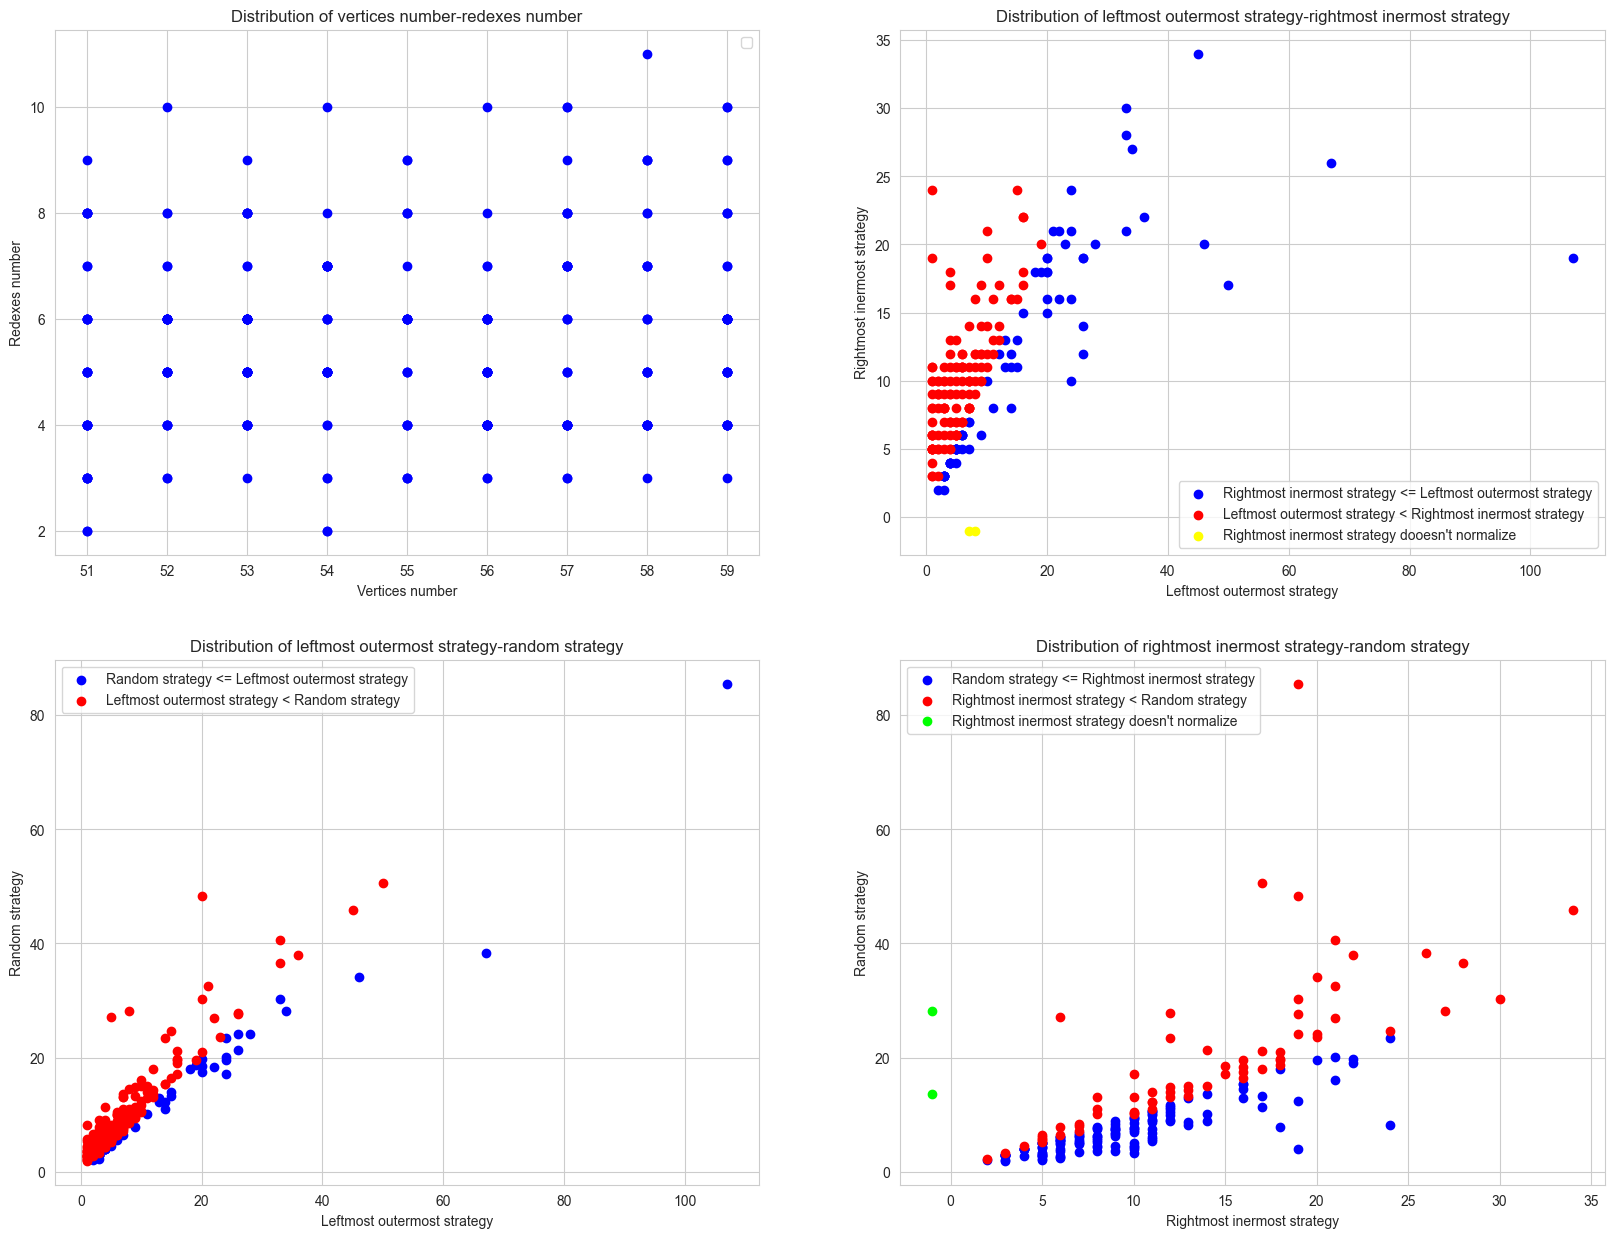

In [20]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(
    ax0, countVertices, countRedexes, "Vertices number", "Redexes number"
)
draw_2d_strategy_distribution(
    ax1, stepsLO, stepsRI, "Leftmost outermost strategy", "Rightmost inermost strategy"
)
draw_2d_strategy_distribution(
    ax2, stepsLO, stepsRand, "Leftmost outermost strategy", "Random strategy"
)
draw_2d_strategy_distribution(
    ax3, stepsRI, stepsRand, "Rightmost inermost strategy", "Random strategy"
)
plt.show()

In [21]:
def draw_plot(x, y, z, q, labels, colors):
    x = list(map(lambda v: -1 if v == float("inf") else v, x))
    y = list(map(lambda v: -1 if v == float("inf") else v, y))
    z = list(map(lambda v: -1 if v == float("inf") else v, z))
    q = list(map(lambda v: -1 if v == float("inf") else v, q))

    data = pd.DataFrame(zip(x, y, z, q), columns=labels)
    ax0 = data.plot(figsize=(20, 10), kind="bar", color=colors)
    ax0.set(
        title="Distribution of number of reduction steps for each term",
        xlabel="Term index",
        ylabel="Number of reduction steps",
    )
    ax0.legend(prop={"size": 10})
    plt.show()
    return ax0

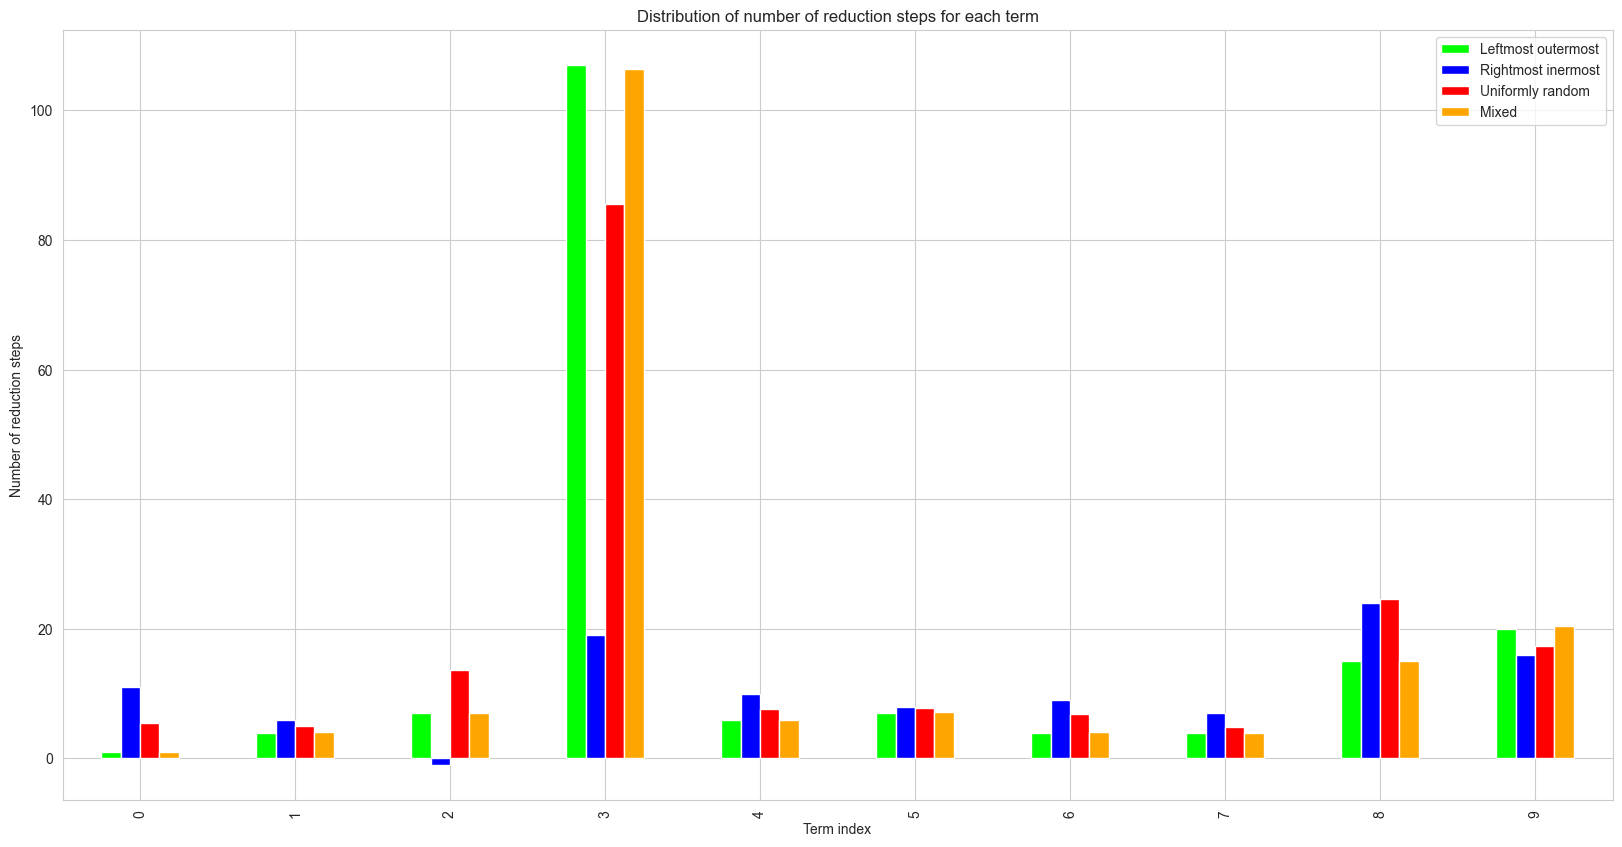

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

In [22]:
colors = ["lime", "blue", "red", "orange"]
labels = ["Leftmost outermost", "Rightmost inermost", "Uniformly random", "Mixed"]
n = 20
draw_plot(
    stepsLO[10:n],
    stepsRI[10:n],
    stepsRand[10:n],
    MixedStrategySteps[10:n],
    labels,
    colors,
)

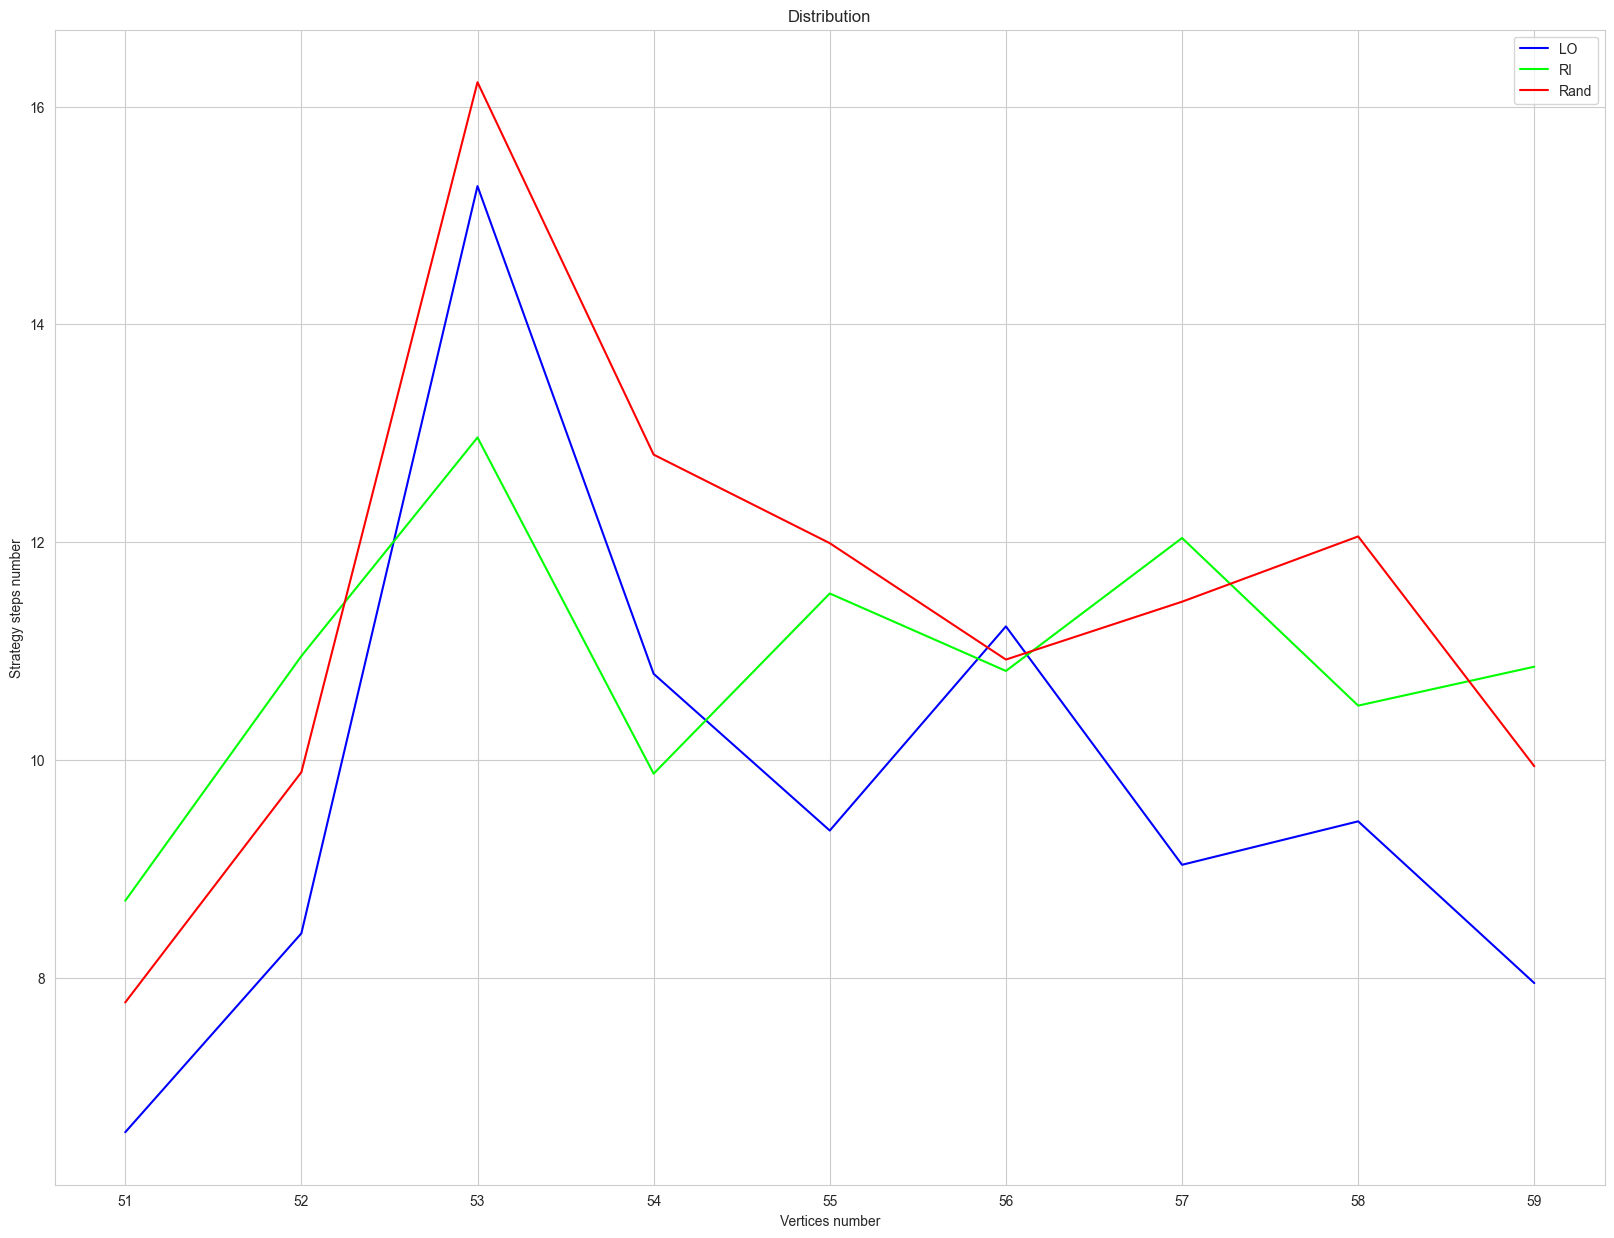

In [23]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append(
        (term, {"LO": stepsLO[i], "RI": stepsRI[i], "Rand": stepsRand[i]})
    )

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [
        d[1]
        for d in data
        if d[1]["LO"] != float("inf")
        and d[1]["RI"] != float("inf")
        and d[1]["Rand"] != float("inf")
    ]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d["LO"]
        avgRI += d["RI"]
        avgRand += d["Rand"]

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {
            "LO": avgLO / count,
            "RI": avgRI / count,
            "Rand": avgRand / count,
        }

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(
    list(average_term_data.keys()),
    [data["LO"] for i, data in average_term_data.items()],
    color="blue",
    label="LO",
)
ax.plot(
    list(average_term_data.keys()),
    [data["RI"] for i, data in average_term_data.items()],
    color="lime",
    label="RI",
)
ax.plot(
    list(average_term_data.keys()),
    [data["Rand"] for i, data in average_term_data.items()],
    color="red",
    label="Rand",
)
ax.set(title="Distribution", xlabel="Vertices number", ylabel="Strategy steps number")
ax.legend(prop={"size": 10})

plt.show()

## TESTS

In [24]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX), Abstraction(x, Application(Abstraction(y, Z), XZ)))

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((λq.((q q) q)) (λq.((λw.e) (q e))))
	v[255325410]: {'free': 0, 'bound': 4}
	v[255325412]: {'free': 2, 'bound': 0}


In [25]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(
    x,
    Abstraction(
        y,
        Application(
            Application(
                Abstraction(z, Application(Atom(y), Atom(z))),
                Application(Abstraction(w, Atom(w)), Atom(w)),
            ),
            Atom(v),
        ),
    ),
)


def testTerm():
    assert len(lambdaTerm.redexes) == 2
    assert lambdaTerm.verticesNumber == 13

    subterm = Application(Atom(y), Atom(z))
    assert lambdaTerm.subterm(1) == lambdaTerm
    assert lambdaTerm.subterm(6) == subterm
    assert lambdaTerm.setSubterm(1, subterm) == subterm

    assert (
        lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber
    )
    assert len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes)

    strategy = LeftmostOutermostStrategy()
    assert len(lambdaTerm._betaConversion(strategy).redexes) == 1
    assert lambdaTerm._betaConversion(strategy).verticesNumber == 10

    assert len(lambdaTerm.normalize(strategy)[0].redexes) == 0
    assert lambdaTerm.normalize(strategy)[1] == 2


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert strategy.redexIndex(lambdaTerm) == 4


testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 33.75it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.005489  1351.603528 -2084.777945     inf      0.095988   
exponpow         0.007904  1282.991513 -2011.835808     inf      0.147677   
powerlaw         0.021626  1163.481969 -1810.541178     inf      0.411395   
rayleigh         0.031303  2531.409099 -1741.877362     inf      0.258671   
norm             0.036654  2698.718932 -1710.315148     inf      0.229378   

             ks_pvalue  
lognorm   4.688980e-02  
exponpow  2.852005e-04  
powerlaw  3.903490e-31  
rayleigh  2.723625e-12  
norm      9.862964e-10  
{'lognorm': {'s': 1.091110419721388, 'loc': 0.30777479791954343, 'scale': 5.523826328528676}}
Norm distribution: (9.865, 11.965231924204396)


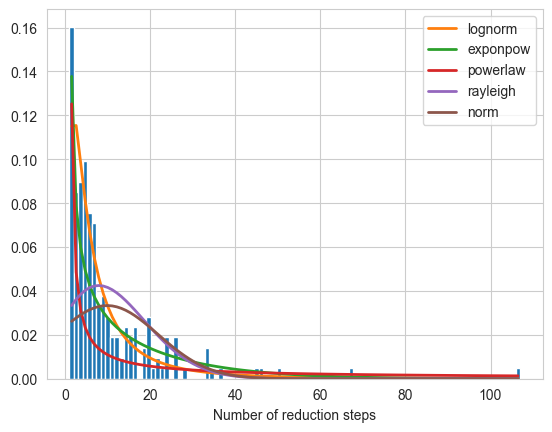

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.88it/s]

Log Norm distribution params: (1.8005598489000534, 0.9986748387989325); expected value = 9.966560761395048


In [26]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.87it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.005489  1351.603528 -2084.777945     inf      0.095988   
exponpow         0.007904  1282.991513 -2011.835808     inf      0.147677   
powerlaw         0.021626  1163.481969 -1810.541178     inf      0.411395   
rayleigh         0.031303  2531.409099 -1741.877362     inf      0.258671   
norm             0.036654  2698.718932 -1710.315148     inf      0.229378   

             ks_pvalue  
lognorm   4.688980e-02  
exponpow  2.852005e-04  
powerlaw  3.903490e-31  
rayleigh  2.723625e-12  
norm      9.862964e-10  
{'lognorm': {'s': 1.091110419721388, 'loc': 0.30777479791954343, 'scale': 5.523826328528676}}
Norm distribution: (9.865, 11.965231924204396)


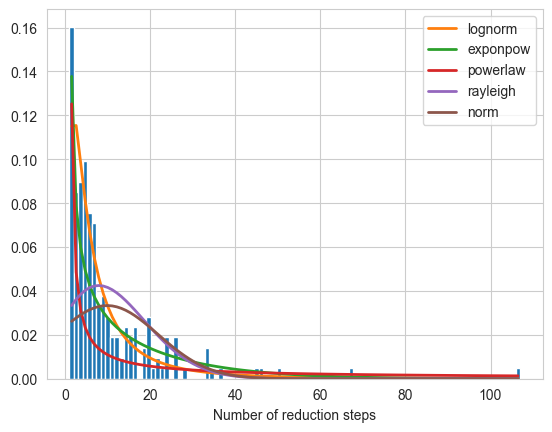

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.18it/s]

Log Norm distribution params: (1.8005598489000534, 0.9986748387989325); expected value = 9.966560761395048


In [27]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)